In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#write a example dataset array good with db scan
# data_example = np.array([[1, 2], [2, 2], [2, 3],[2.5,2.5],[5,7], [5,9], [6,8],[5.5,9.5],[10,10],[10,11],[11,11],[11,12],[11.5,11.5]])

data = pd.read_csv('tracks_features.csv')


In [182]:
data.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                100000 non-null  object 
 1   name              100000 non-null  object 
 2   album             100000 non-null  object 
 3   album_id          100000 non-null  object 
 4   artists           100000 non-null  object 
 5   artist_ids        100000 non-null  object 
 6   track_number      100000 non-null  int64  
 7   disc_number       100000 non-null  int64  
 8   explicit          100000 non-null  bool   
 9   danceability      100000 non-null  float64
 10  energy            100000 non-null  float64
 11  key               100000 non-null  int64  
 12  loudness          100000 non-null  float64
 13  mode              100000 non-null  int64  
 14  speechiness       100000 non-null  float64
 15  acousticness      100000 non-null  float64
 16  instrumentalness  100

In [156]:
#preprocessing data
# columns_to_scale = ['danceability', 'energy']
# scaler = StandardScaler()
# scaler.fit(data[columns_to_scale])
# data_scaled = data.copy()
# data_scaled[columns_to_scale] = scaler.transform(data[columns_to_scale])

columns_to_scale = ['danceability', 'tempo']
scaler = MinMaxScaler()
scaler.fit(data[columns_to_scale])
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaler.transform(data[columns_to_scale])


# data_pca_scaled = scaler.fit_transform(X_pca)

In [157]:
X = data_scaled.iloc[:, [9,19]].values
X
# X = data_pca_scaled
# X

array([[0.50537634, 0.55575405],
       [0.64408602, 0.4886993 ],
       [0.33870968, 0.70584714],
       ...,
       [0.71827957, 0.645726  ],
       [0.78172043, 0.63629893],
       [0.51505376, 0.77778982]])

Calculate the parameters

In [158]:
from sklearn.neighbors import NearestNeighbors # importing the library
no_neighbors = 4 # setting the number of neighbors
neighb = NearestNeighbors(n_neighbors=no_neighbors) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours

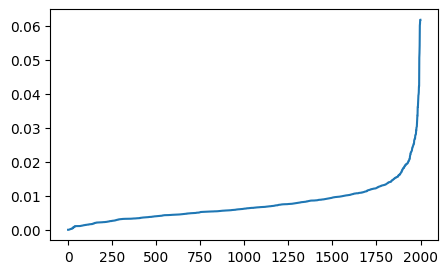

In [159]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [160]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(distances)+1), y = distances, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
kneedle.knee_y

0.04226555071983595

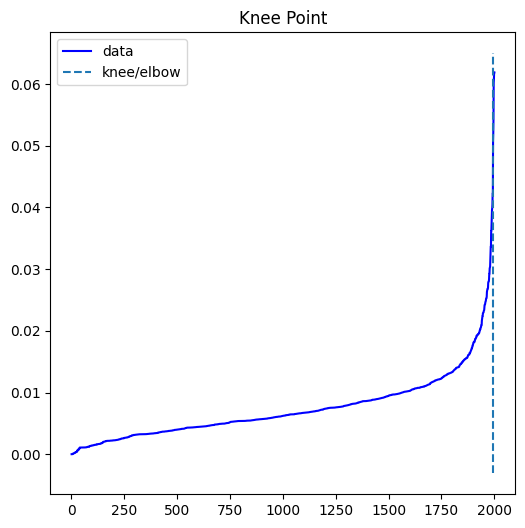

In [161]:
kneedle.plot_knee()
plt.show()

minPoints = 18
Eps = 5

Implementing DBScan

In [175]:
from sklearn.cluster import DBSCAN

# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.042, min_samples = 4).fit(X) # fitting the model
Y = dbscan.fit_predict(X) # getting the predicted values
labels = dbscan.labels_ # getting the labels
labels


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

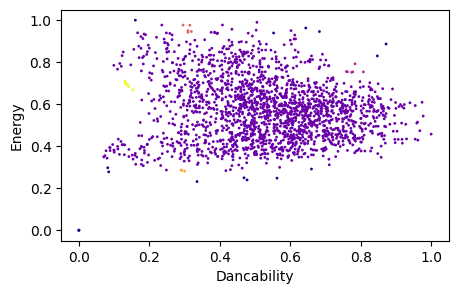

In [176]:
# Plot the clusters
plt.scatter(X[:, 0], X[:,1], s = 1, c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Dancability") # X-axis label
plt.ylabel("Energy") # Y-axis label
plt.show() # showing the plot

Davies Bouldin Index

In [177]:
davies_bouldin_score(X, labels)

2.181368986255466

Silhouette

In [178]:
silhouette_score(X, labels)


-0.12322457445394058